In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
%matplotlib inline

<img src="img/features.png">

# Визуализация

Одним из основных способов исследования данных является их визуализация.

Визуализация позволяет стоить предположения о зависимости между переменными не просматривая строку за строкой в таблице

In [2]:
plt.style.use('ggplot')
mlp.rcParams['figure.figsize'] = [14.0, 6.0]

In [3]:
data = pd.read_csv('data/athlete_events.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Фигура и оси

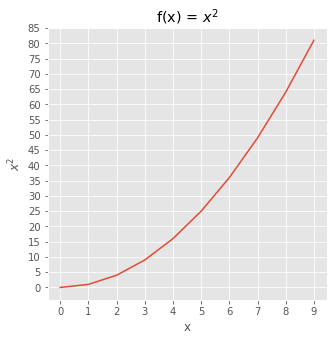

In [6]:
fig, ax = plt.subplots();
fig.set_figwidth(5); # ширина фигуры
fig.set_figheight(5); # высота фигуры
ax.set_title("f(x) = $x^2$"); # заголовок графика
ax.set_xticks(np.arange(10)); # отсечки на x оси
ax.set_yticks(np.linspace(0, 100, 21)); # отсечки на y оси
ax.set_ylabel("$x^2$"); # подписть оси ординат
ax.set_xlabel("x"); # подписть оси абцисс
ax.plot(np.arange(10), np.power(np.arange(10), 2)); # вызов отрисовки

## Plot

plot - стандартный график зависимости двух переменных

plot - применяется для иследования зависимости двух вещественных переменных, когда одной переменной соотвествует одно значение

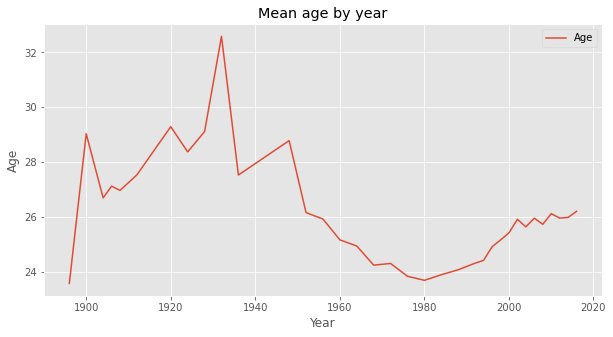

In [7]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Mean age by year");
ax.set_ylabel("Age");
ax.set_xlabel("Year");
data[['Age', 'Year']].groupby(['Year']).mean().plot(ax=ax);

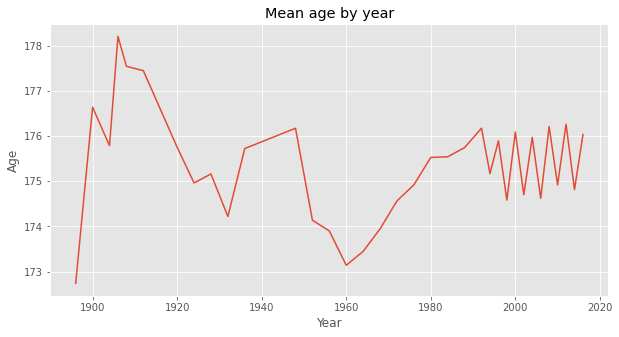

In [8]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Mean age by year");
ax.set_ylabel("Age");
ax.set_xlabel("Year");
ax.plot(data.groupby('Year')['Height'].mean());

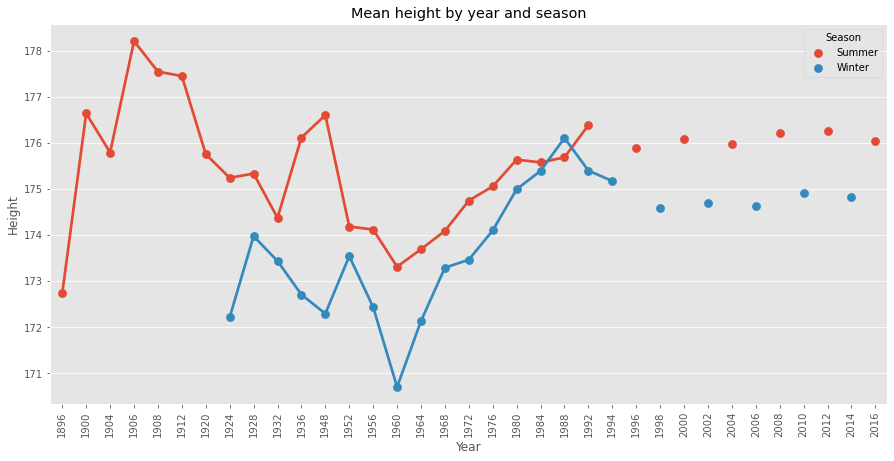

In [9]:
grouped_data = data.groupby(['Year', 'Season'])["Height"].mean()
grouped_data = grouped_data.reset_index()

fig, ax = plt.subplots();
fig.set_figwidth(15);
fig.set_figheight(7);
ax.set_title("Mean height by year and season");
ax.set_ylabel("Height");
ax.set_xlabel("Year");
ax.xaxis.set_tick_params(rotation=90);

sns.pointplot(
    x="Year", 
    y="Height",
    hue="Season",
    data=grouped_data,
    ax=ax
);


## Гистограмма

гистограмма - график апроксимирующий плотность вероятности

гистограмма строится следующим образом

<img src="img/hist.png">

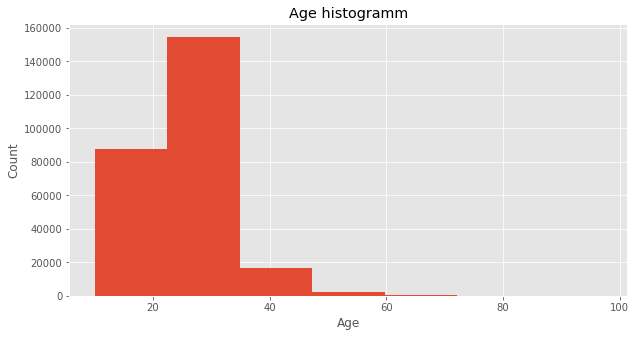

In [10]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Age histogramm");
ax.set_xlabel("Age");
ax.set_ylabel("Count");

data['Age'].hist(bins=7, ax=ax);

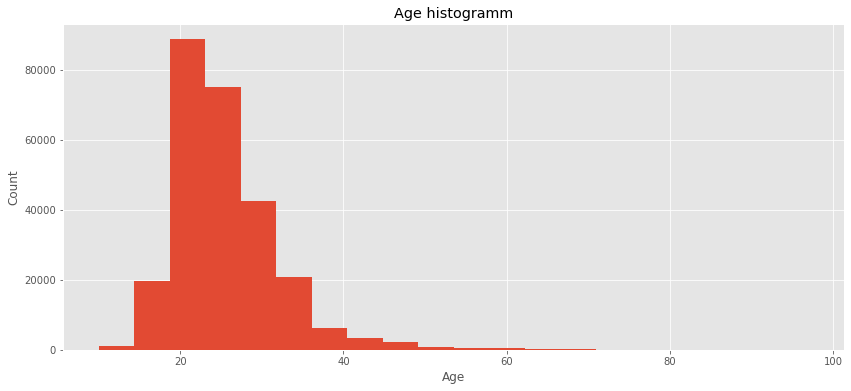

In [11]:
ig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Age histogramm");
ax.set_xlabel("Age");
ax.set_ylabel("Count");
ax.hist(data['Age'], bins=20);

/home/imd/miniconda3/envs/mlisuct/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


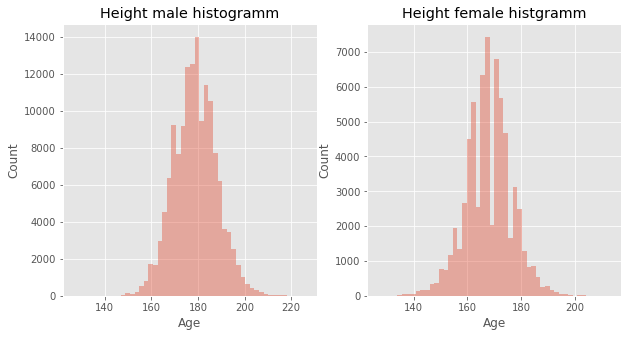

In [12]:
fig, axs = plt.subplots(1, 2);
fig.set_figwidth(10);
fig.set_figheight(5);
axs[0].set_title("Height male histogramm");
axs[1].set_title("Height female histgramm");
for ax in axs:
    ax.set_xlabel("Age");
    ax.set_ylabel("Count");

sns.distplot(x=data[data["Sex"] == "M"]["Height"], kde=False, ax=axs[0]);
sns.distplot(x=data[data["Sex"] == "F"]["Height"], kde=False, ax=axs[1]);

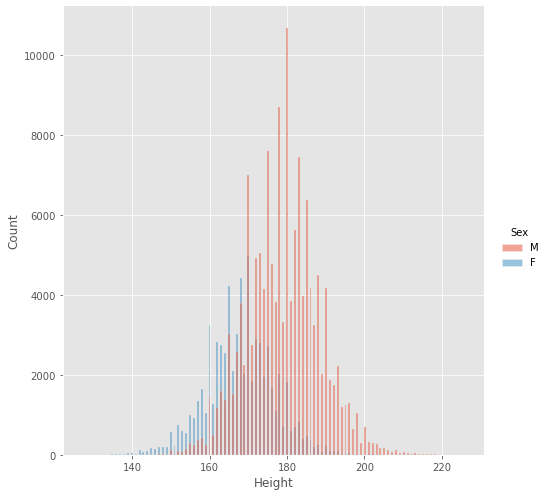

In [13]:
sns.displot(data=data, x="Height", hue="Sex", height=7);

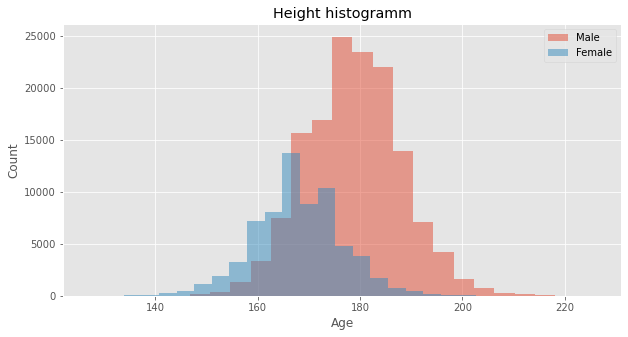

In [14]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Height histogramm");
ax.set_xlabel("Age");
ax.set_ylabel("Count");
ax.hist(data[data["Sex"] == "M"]['Height'], bins=25, alpha=0.5, label="Male");
ax.hist(data[data["Sex"] == "F"]['Height'], bins=25, alpha=0.5, label="Female");
ax.legend();

## Scatter

scatter - является простейшим способом отображения переменных на графике и представляет собой точку на графике, на пересечении двух значений

scatter полезен для исследования зависимости двух вещественных переменных, когда одному значению переменной может соответствовать любое количество значений другой переменной

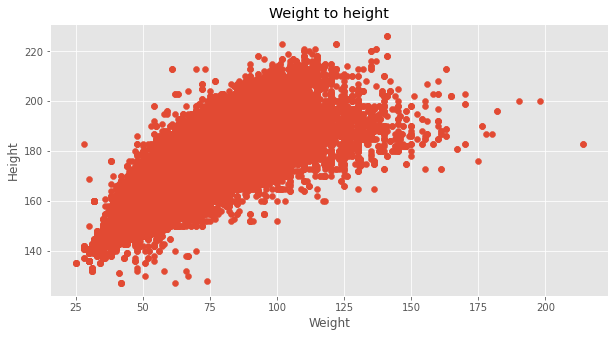

In [15]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Weight to height");
ax.set_xlabel("Weight");
ax.set_ylabel("Height");
ax.scatter(data['Weight'], data['Height']);


зависимость на графике выше похоже на зависимость от корня переменной, поэтому стоит возвести рост в квадрат и посмотреть на линейность

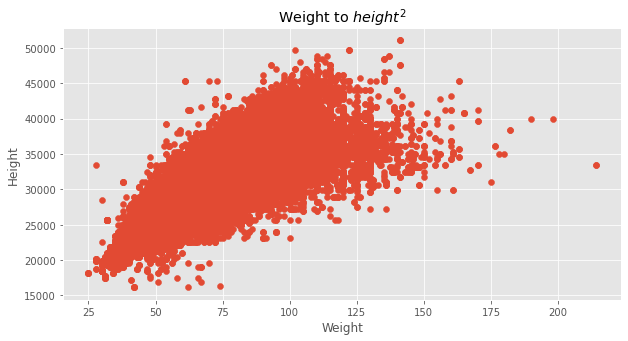

In [16]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Weight to $height^2$");
ax.set_xlabel("Weight");
ax.set_ylabel("Height");
ax.scatter(data['Weight'], data['Height'] ** 2);

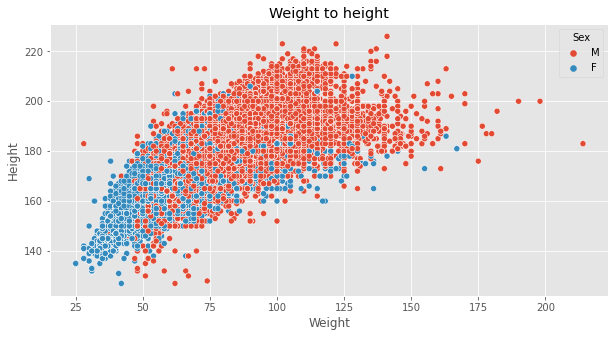

In [17]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Weight to height");
ax.set_xlabel("Weight");
ax.set_ylabel("Height");
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=data, ax=ax);

## Boxplot

boxplot - так же как и гистограмма представляет собой график плотности вероятности, но в отличии от гистограммы box имеет более компактный вид

за счет компактности boxplot мы можем строить зависимости между категориальной и вещественной переменной

<img src="./img/box.png">

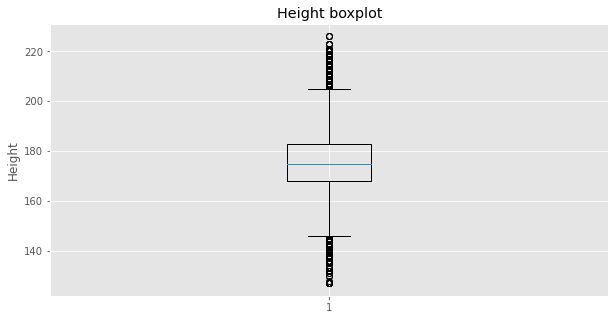

In [18]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Height boxplot");
ax.set_ylabel("Height");
ax.boxplot(data[~data['Height'].isnull()]['Height']);

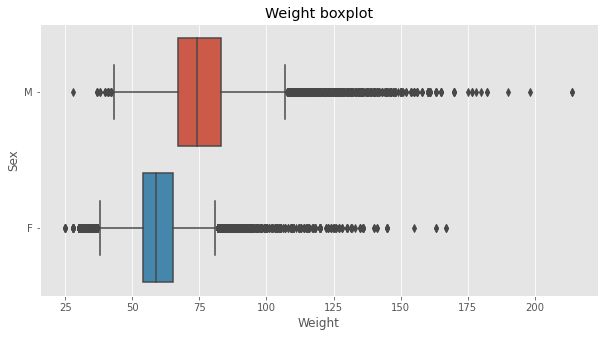

In [19]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Weight boxplot");
sns.boxplot(x='Weight', y="Sex", data=data, orient="h", ax=ax);

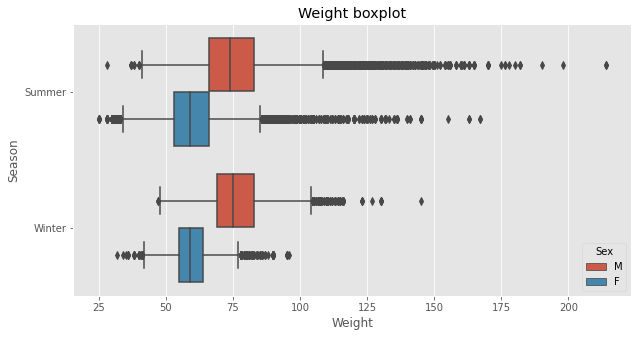

In [20]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Weight boxplot");
sns.boxplot(x='Weight', y="Season", hue="Sex", data=data, orient="h", ax=ax);

## Countplot или barplot

bar - это столбец установленного размера, обычно с помощью bar стоят количественные графики для категориальных переменных

countplot - является простым методом построения таких графиков

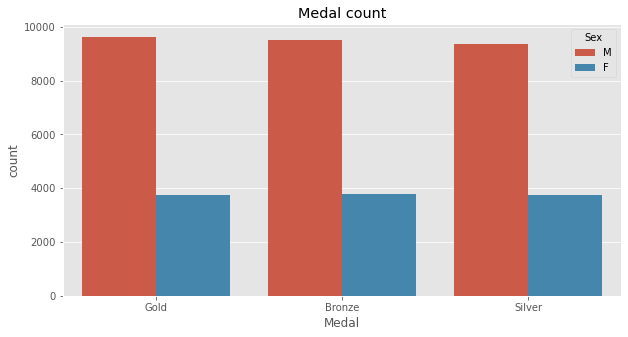

In [21]:
fig, ax = plt.subplots();
fig.set_figwidth(10);
fig.set_figheight(5);
ax.set_title("Medal count");
sns.countplot(x='Medal', hue='Sex', data=data, ax=ax);

## Pairplot и scatter_matrix

функции предназначенные для построенния нескольких графиков зависимости между вещественными переменными

в обоих случаях для двух разных переменных строятся scatterplot, однако отличие pair_plot что между одинаковыми переменными строится гистограмма

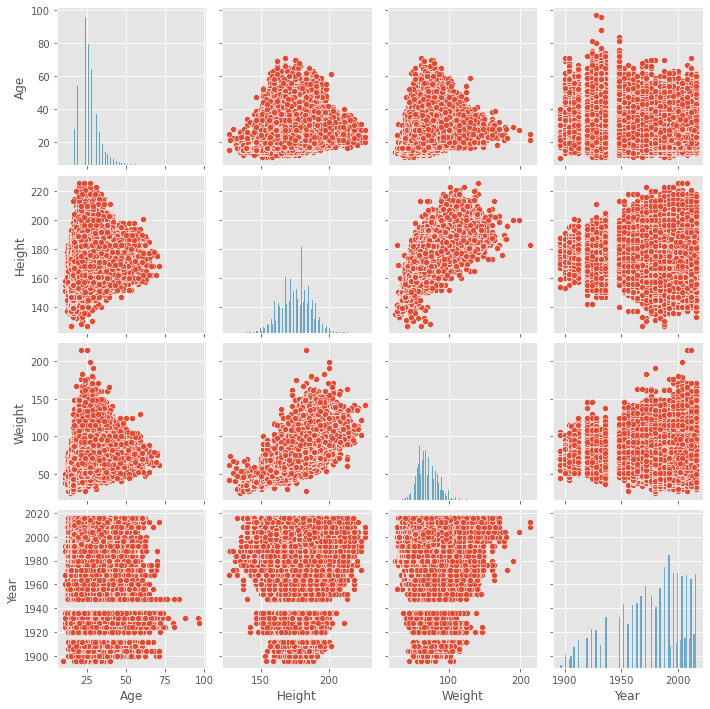

In [22]:
sns.pairplot(data[['Age', 'Height', 'Weight', 'Year']]);

## Heatmap

heatmap - тепловая карта для иследования наиболее выраженных значений

In [23]:
corr = data[['Age', 'Height', 'Weight', 'Year']].corr()

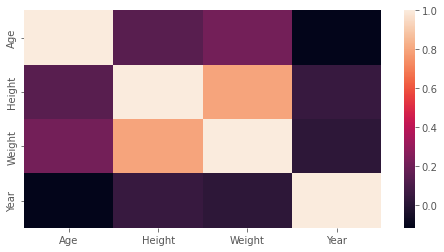

In [24]:
plt.figure(figsize=(8, 4));
sns.heatmap(corr);

## Полезные материалы

tutorial matplotlib - https://matplotlib.org/tutorials/index.html

tutorial seaborn - https://seaborn.pydata.org/tutorial.html

tutorial plotly - https://plot.ly/python/

гистограмма - https://youtu.be/qBigTkBLU6g?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9

boxplot - https://youtu.be/fHLhBnmwUM0?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9
